# OpenCV Library


<h2>Objectives</h2>


Image processing and computer vision tasks include displaying, cropping, flipping, rotating,  image segmentation, classification, image restoration,  image recognition, image generation.  Also, working with images via the cloud requires storing and transmitting, and gathering images through the internet. 
Python is an excellent choice as it has many image processing tools, computer vision, and artificial intelligence libraries. Finally, it has many libraries for working with files in the cloud and the internet.
A digital image is simply a file on your computer. In this lab, you will gain an understanding  of these files and learn to work with these files with some popular libraries


<ul>
    <li><a href='#PIL'>Open CV </a>
        <ul>
            <li>Image Files and Paths  </li>
            <li>Load in Image in Python</li>
            <li>Plotting an Image </li>
            <li>Gray Scale Images, Quantization and Color Channels  </li>
            <li>Gray Scale Images, Quantization and Color Channels  </li>
        </ul>
    </li>
    
</ul>


----


Download the image for the lab:


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png -O lenna.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/baboon.png -O baboon.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/barbara.png -O barbara.png  

--2023-08-30 19:43:58--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473831 (463K) [image/png]
Saving to: ‘lenna.png’

lenna.png           100%[===================>] 462.73K  --.-KB/s    in 0.01s   

2023-08-30 19:43:59 (46.3 MB/s) - ‘lenna.png’ saved [473831/473831]

--2023-08-30 19:43:59--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/baboon.png
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-cours

First, let's define a helper function to concatenate two images side-by-side. You will need to understand this code this moment, but this function will be used repeatedly in this tutorial to showcase the results.


In [2]:
def get_concat_h(im1, im2):
    #https://note.nkmk.me/en/python-pillow-concat-images/
    dst = Image.new('RGB', (im1.width + im2.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst

## Image Files and Paths  


An image is stored as a file on your computer. Below, we define `my_image` as the filename of a file in this directory.


In [3]:
my_image = "lenna.png"

Filename consists of two parts, the name of the file and the extension, separated by a full stop (`.`). The extension specifies the format of the image. There are two popular image formats -- Joint Photographic Expert Group image (or `.jpg`, `.jpeg`) and Portable Network Graphics (or `.png`). These file types make it simpler to work with images. For example, it compresses the image using sine/cosine approximations, taking less spaces on your drive to store the image.


Image files are stored in the file system of your computer. The location of it is specified using a "path", which is often unique. You can find the path of your current working directory with Python's `os` module. The `os` module provides functions to interact with the file system, e.g. creating or removing a directory (folder), listing its contents, changing and identifying the current working directory. 


In [4]:
import os
cwd = os.getcwd()
cwd 

'/resources/labs/CV0101EN'

The "path" to an image can be found using the following line of code.


In [5]:
image_path = os.path.join(cwd, my_image)
image_path

'/resources/labs/CV0101EN/lenna.png'

## Load in Image in Python


OpenCV is a library used for computer vision. It has more functionality than the `PIL` library but is more difficult to use. We can import `OpenCV` as follows:


In [6]:
import cv2

The <code>imread()</code> method loads an image from the specified file, the input is the <code>path</code> of the image to be read (just like PIL), the <code>flag</code> paramter specifies how the image should be read, and the default value is <code>cv2.IMREAD_COLOR</code>.


In [7]:
image = cv2.imread(my_image)

The result is a numpy array with intensity values as 8-bit unsigned integers. 


In [8]:
type(image)

numpy.ndarray

We can get the shape of the array from the `shape` attribute.


In [9]:
image.shape

(512, 512, 3)

The shape is the same as the PIL array, but there are several differences; for example, PIL returns in (R, G, B) format whereas OpenCV returns in (B, G, R) format.


Each pixel could take on 256 possible values as intensity, ranging from 0 to 255, with 0 being the lowest intensity and 255 being the highest. The maximum and minimum intensity values of an image can be obtained, respectively, by calling:


In [10]:
image.max()

255

and


In [11]:
image.min()

3

##  Plotting an Image 


You can use OpenCV's `imshow` function to open the image in a new window, but this may give you some issues in Jupyter:


In [12]:
#cv2.imshow('image', imgage)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

You can also use the `imshow` function from the `matplotlib` library:


In [13]:
import matplotlib.pyplot as plt

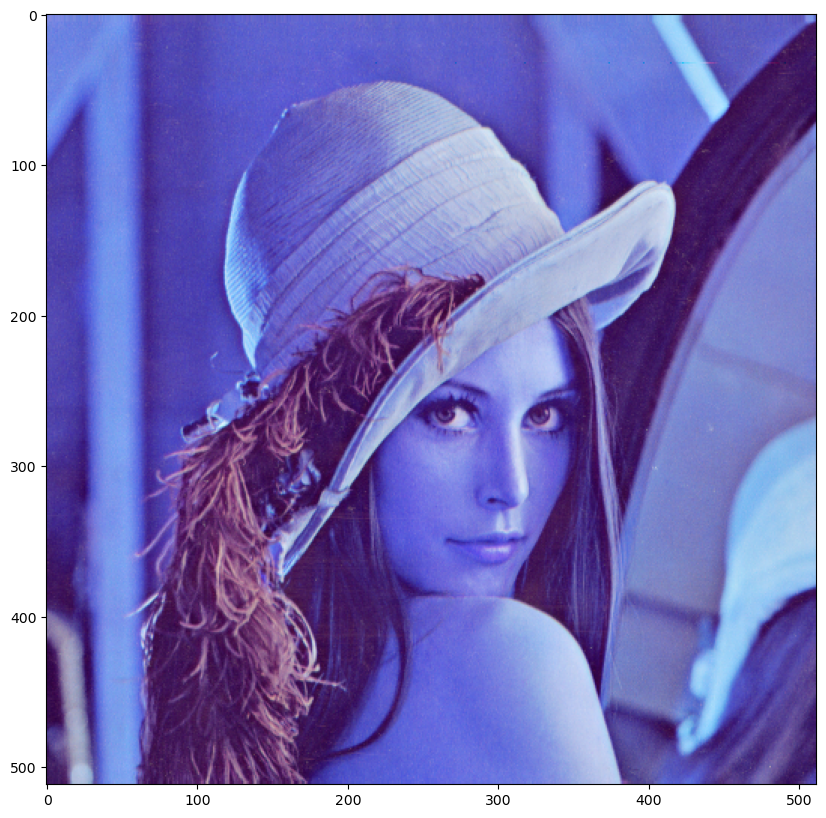

In [14]:
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.show()

The image output doesn't look natural. This is because the order of RGB Channels are different. We can change the color space with conversion code and the function `cvtColor` from the `cv2` library:


In [15]:
new_image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

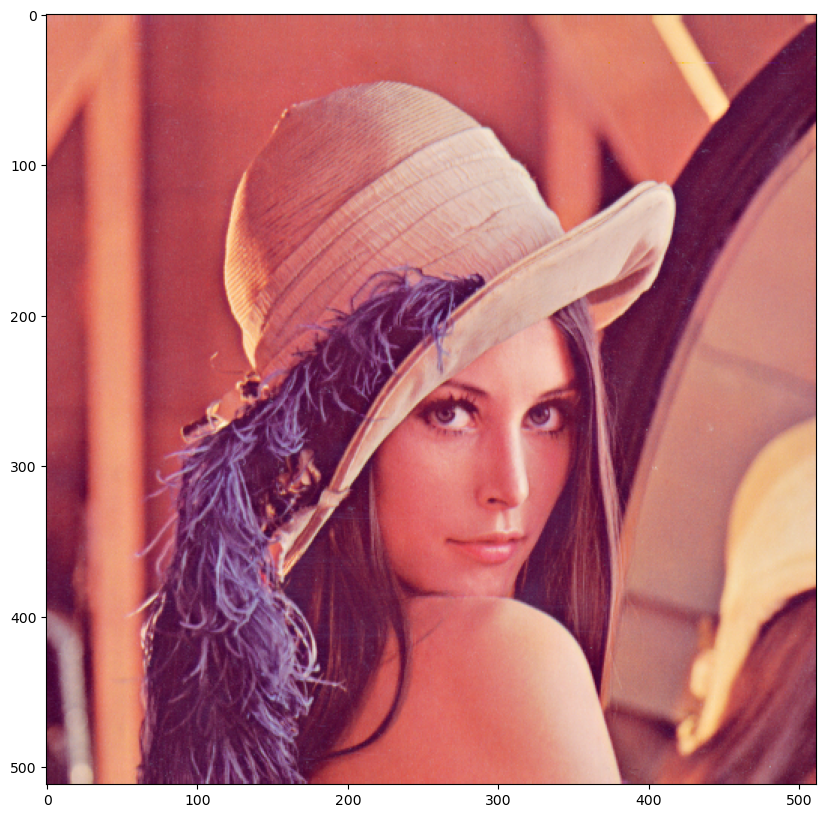

In [16]:
plt.figure(figsize=(10,10))
plt.imshow(new_image)
plt.show()

You can also load the image using its path, this comes in handy if the image is not in your working directory:


In [17]:
image = cv2.imread(image_path)
image.shape

(512, 512, 3)

You can save the image as in `jpg` format.


In [18]:
cv2.imwrite("lenna.jpg", image)

True

### Grayscale Images


Grayscale images have pixel values representing the amount of light or intensity. Light shades of gray have a high-intensity darker shades have a lower intensity. White has the highest intensity, and black the lowest. We can convert an image to Gray Scale using a color conversion code and the function <code>cvtColor</code>.


The code for RGB to gray is <code>cv2.COLOR_BGR2GRAY</code>, we apply the function:


In [ ]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

The image array has only two dimensions, i.e. only one color channel:


In [ ]:
image_gray.shape

We can plot the image using `imshow` but we have to specify the color map is gray:


In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(image_gray, cmap='gray')
plt.show()

We can save the image as a grayscale image, let's save it as a `jpg` as well, in the working directory.


In [ ]:
cv2.imwrite('lena_gray_cv.jpg', image_gray)

You can also load in a grayscale image we have to set <code>flag</code> parameter to gray color conversation code: <code>cv2.COLOR_BGR2GRAY</code>:


In [ ]:
im_gray = cv2.imread('barbara.png', cv2.IMREAD_GRAYSCALE)

We can plot the image:


In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(im_gray,cmap='gray')
plt.show()

### Color Channels  


We can also work with the different color channels. Consider the following image:


In [ ]:
baboon=cv2.imread('baboon.png')
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(baboon, cv2.COLOR_BGR2RGB))
plt.show()

We can obtain the different RGB colors and assign them to the variables <code>blue</code>, <code>green</code>, and <code>red</code>, in (B, G, R) format.


In [ ]:
blue, green, red = baboon[:, :, 0], baboon[:, :, 1], baboon[:, :, 2]

We can concatenate each image channel the images using the function <code>vconcat</code>.


In [ ]:
im_bgr = cv2.vconcat([blue, green, red])

Plotting the color image next to the red channel in grayscale, we see that regions with red have higher intensity values.


In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(cv2.cvtColor(baboon, cv2.COLOR_BGR2RGB))
plt.title("RGB image")
plt.subplot(122)
plt.imshow(im_bgr,cmap='gray')
plt.title("Different color channels  blue (top), green (middle), red (bottom)  ")
plt.show()

### Indexing  


We can use numpy slicing. For example, we can return the first 256 rows corresponding to the top half of the image:


In [ ]:
rows = 256

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(new_image[0:rows,:,:])
plt.show()

We can also return the first 256 columns corresponding to the first half of the image:


In [ ]:
columns = 256

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(new_image[:,0:columns,:])
plt.show()

If you want to reassign an array to another variable, you should use the `copy` method (we will cover this in the next section).


In [ ]:
A = new_image.copy()
plt.imshow(A)
plt.show()

If we do not apply the method `copy()`, the variable will point to the same location in memory. Consider the variable `B` below, if we set all values of array `A` to zero, since `A` and `B` points to the same object in the memory, `B` will also have all-zero elements:


In [ ]:
B = A
A[:,:,:] = 0
plt.imshow(B)
plt.show()

We can also manipulate elements using indexing. In the following piece of code, we create a new array `baboon_red` and set all but the red color channels to zero. Therefore, when we display the image, it appears red:


In [ ]:
baboon_red = baboon.copy()
baboon_red[:, :, 0] = 0
baboon_red[:, :, 1] = 0
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(baboon_red, cv2.COLOR_BGR2RGB))
plt.show()

We can do the same for blue:  


In [ ]:
baboon_blue = baboon.copy()
baboon_blue[:, :, 1] = 0
baboon_blue[:, :, 2] = 0
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(baboon_blue, cv2.COLOR_BGR2RGB))
plt.show()

We can do the same for green:


In [ ]:
baboon_green = baboon.copy()
baboon_green[:, :, 0] = 0
baboon_green[:, :, 2] = 0
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(baboon_green, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
image=cv2.imread('baboon.png')

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
image=cv2.imread('baboon.png') # replace and add you image here name 
baboon_blue=image.copy()
baboon_blue[:,:,1] = 0
baboon_blue[:,:,2] = 0
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(baboon_blue, cv2.COLOR_BGR2RGB))
plt.show()